# Daniella Zunic's Final Project: Implementation of FFT from Scratch

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from time import perf_counter
from statistics import mean
from matplotlib.axis import Axis

# DFT Function

In [ ]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    mult = np.exp(-1j * ((2*np.pi)/N) * k * n)
    X = np.dot(mult, x)
    return X

# FFT Function

In [ ]:
def fft(x):
    #takes 1D array input
    #Base Case
    length = len(x)
    
    if length == 1:
        return x

    elif length % 2 != 0:
        raise ValueError("The size of the array must be a power of 2.")

    #Divide Part
    even = [i for index, i in enumerate(x) if index%2==0]
    odd = [i for index, i in enumerate(x) if index%2!=0]

    #Conquer Part
    even_result = fft(even)
    odd_result = fft(odd)

    new_array = np.zeros(length, dtype = 'complex')
    n = 1
    n_term = np.exp((-2*np.pi*1j)/length)

    #Combination Part
    for i in range(length//2):
        new_term = (n * odd_result[i])
        new_array[i] = even_result[i] + new_term
        new_array[i + length//2] = even_result[i] - new_term
        n *= n_term
    return new_array

# Time 1,000 Trials

In [ ]:
def timed_trials():
    time1 = []
    time2 = []
    time3 = []
    averages = []

    #For Loop of 1,000 Trials
    for i in range(1000):
        x = np.random.random(1024)

        #DFT Timer
        tic1 = time.perf_counter()
        result1 = dft(x)
        toc1 = time.perf_counter()

        #FFT Timer
        tic2 = time.perf_counter()
        result2 = fft(x)
        toc2 = time.perf_counter()

        #Numpy FFT Timer
        tic3 = time.perf_counter()
        result3 = np.fft.fft(x)
        toc3 = time.perf_counter()

        #Calculates the Actual Times
        actual_time1 = toc1 - tic1
        actual_time2 = toc2 - tic2
        actual_time3 = toc3 - tic3

        #Keeps Track of all 1,000 Times for each Function
        time1.append(actual_time1)
        time2.append(actual_time2)
        time3.append(actual_time3)

    #Finds the Average Time of 1,000 Trials for each Function
    average_time_dft = mean(time1)
    average_time_fft = mean(time2)
    average_time_numpy_fft = mean(time3)

    #Saves the Averages as a List
    averages.extend([average_time_dft, average_time_fft, average_time_numpy_fft])
    
    return averages, time1, time2, time3

# Line Plot Comparisons Function

In [ ]:
def line_plots(dft_times, fft_times, numpy_fft_times):
    x = len(dft_times)
    plt.plot(dft_times, label = 'DFT', color = 'red')
    plt.plot(fft_times, label = 'FFT', color = 'green')
    plt.plot(numpy_fft_times, label = "Numpy's FFT", color = 'blue')

    plt.title('Function Time Comparisons (Trials = 1,000; Array Sizes = 1024)')
    plt.xlabel('Trial Number')
    plt.ylabel('Times (Seconds)')
    plt.legend()
    
    plt.show()

# Table Comparisons Function

In [ ]:
def averages_table(averages):
    fig, ax = plt.subplots()
    table_data = [
        ['Function', 'Average Time For The 1,000 Trials'],
        ["DFT", str(round(averages[0],6)) + ' seconds'],
        ['FFT', str(round(averages[1],6)) + ' seconds'],
        ["Numpy's FFT", "{:.6f}".format(float(averages[2])) + ' seconds']
    ]

    table = ax.table(cellText = table_data, loc = 'center')
    
    table[(0, 0)].set_facecolor("#1ac3f5")
    table[(0, 1)].set_facecolor('#eafff5')
    
    table.set_fontsize(25)
    table.scale(2,2)
    ax.axis('off')

    plt.show()

# Time Complexity Comparison Function

In [ ]:
#Times the FFT Function
def timer(x):
  new_tic = time.perf_counter()
  new_result = fft(x)
  new_toc = time.perf_counter()
  new_actual_time = new_toc - new_tic
  return new_actual_time

#Compares O(nlogn) versus FFT Times
def time_complexity_comparison():
    x_axis = list(range(2, 1024))
    powers = [2**j for j in range(1,11)]

    #O(nlogn) Times
    log_time = []
    for i in powers:
        time = i * np.log(i)
        log_time.append(time)

    #FFT Times
    fft_time = []
    for i in powers:
        x = np.random.random(i)
        new_actual_time = timer(x)
        fft_time.append(new_actual_time)

    #Plotting the Lines

    figure, axis = plt.subplots(2, 1)

    axis[0].plot(powers, log_time, 'tab:orange')
    axis[0].set_title('O(nlogn) Complexity')

    axis[1].plot(powers, fft_time, 'tab:purple')
    axis[1].set_title('FFT Times')   
    
    for axis in axis.flat:
      axis.set(xlabel= 'Input Size (Must be a Power of 2)', ylabel = 'Time / Operations')
      axis.label_outer()

    plt.show()

# Testing : Ensure Functions Yield Same Results

In [ ]:
x = np.random.random(8)
print('Input Array of size', str(len(x)), '=', x)
print()
print('\033[91m' + 'DFT Result =' + '\033[0m' , dft(x))
print()
print('\033[92m' + 'FFT Result =' + '\033[0m', fft(x))
print()
print('\033[94m' + 'Numpy FFT Result =' + '\033[0m' , np.fft.fft(x))

print()
print('\033[1m' +'\033[4m'+ 'Do the results match?' + '\033[0m' + ' (Using numpy.allclose())')
print(np.allclose(fft(x), np.fft.fft(x)))

Input Array of size 8 = [0.19875771 0.75259603 0.27482308 0.7548091  0.06760167 0.23855459
 0.65505471 0.31569989]

DFT Result = [ 3.25789677+0.00000000e+00j  0.18414114-2.93747658e-01j
 -0.66351841+7.93583759e-02j  0.07817095-1.05421091e+00j
 -0.86542245-2.04432060e-16j  0.07817095+1.05421091e+00j
 -0.66351841-7.93583759e-02j  0.18414114+2.93747658e-01j]

FFT Result = [ 3.25789677+0.j          0.18414114-0.29374766j -0.66351841+0.07935838j
  0.07817095-1.05421091j -0.86542245+0.j          0.07817095+1.05421091j
 -0.66351841-0.07935838j  0.18414114+0.29374766j]

Numpy FFT Result = [ 3.25789677+0.j          0.18414114-0.29374766j -0.66351841+0.07935838j
  0.07817095-1.05421091j -0.86542245+0.j          0.07817095+1.05421091j
 -0.66351841-0.07935838j  0.18414114+0.29374766j]

Do the results match? (Using numpy.allclose())
True


# Main Function

## Save Results of the timed_trials Function


In [ ]:
averages, dft_times, fft_times, numpy_fft_times = timed_trials()

## Display Results of the line_plots Function

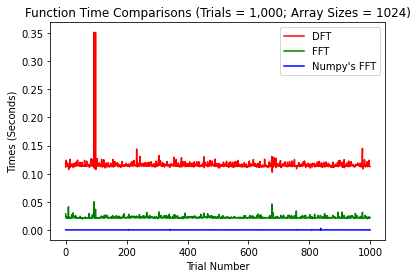

In [ ]:
line_plots(dft_times, fft_times, numpy_fft_times)

## Display Results of the averages_table Function

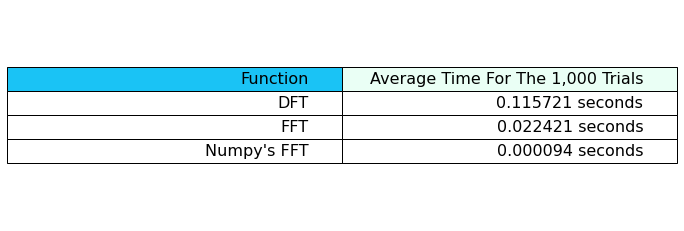

In [ ]:
averages_table(averages)

## Display Results of the time_complexity_comparison Function

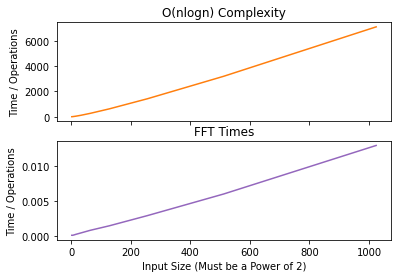

In [ ]:
time_complexity_comparison()